<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_HR_gr1/blob/Vatolin-Ivan-folder/Vatolin%20Ivan/InspectrumClinic_HR_Ivan_Vatolin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ссылка на сырые данные HR и загрузка
https://drive.google.com/uc?id=1LAq5m2yO1fRl45nO3_LpW0xGyl-kvOaX

---

In [19]:
!gdown 1LAq5m2yO1fRl45nO3_LpW0xGyl-kvOaX

Downloading...
From: https://drive.google.com/uc?id=1LAq5m2yO1fRl45nO3_LpW0xGyl-kvOaX
To: /content/Dataset_HR_581.xlsx
100% 119k/119k [00:00<00:00, 75.6MB/s]


# Анализ данных

In [20]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import time
import re
from sklearn import preprocessing as pr 
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.metrics import *
from math import sqrt
from sklearn.cluster import KMeans
from tensorflow.keras import utils
from difflib import get_close_matches
from sklearn.utils import validation

#Загрузка данных

Столбцы переименуем

In [21]:
column_names = ['id', 'dt', 'fio', 'gender_age_birthday', 'salary', 
                'job_position_search', 'city', 'employment', 'schedule', 
                'experience', 'last_position', 'job_position_current', 'education', 
                'date_last_modified', 'suitable']
df = pd.read_excel(open('/content/Dataset_HR_581.xlsx', 'rb'), sheet_name='Лист1', names=column_names)

#Подготовка данных к анализу

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    579 non-null    int64 
 1   dt                    579 non-null    object
 2   fio                   579 non-null    object
 3   gender_age_birthday   579 non-null    object
 4   salary                579 non-null    object
 5   job_position_search   579 non-null    object
 6   city                  579 non-null    object
 7   employment            579 non-null    object
 8   schedule              579 non-null    object
 9   experience            579 non-null    object
 10  last_position         579 non-null    object
 11  job_position_current  579 non-null    object
 12  education             579 non-null    object
 13  date_last_modified    579 non-null    object
 14  suitable              500 non-null    object
dtypes: int64(1), object(14)
memory usage: 68

In [23]:
df.head()

,id,dt,fio,gender_age_birthday,salary,job_position_search,city,employment,schedule,experience,last_position,job_position_current,education,date_last_modified,suitable
0,0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да
2,2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да
3,3,2023-01-11 00:00:00,Хозаев Расул Шагаманович,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),"Магистр, 2014, Московский государственный техн...",24 января 2023 в 12:07,да
4,4,2023-01-11 00:00:00,Шадрин Олег Михайлович,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,"Высшее, 2021, Российская академия народного хо...",6 февраля 2023 в 11:18,да


Удалим ненужный столбец id, т.к. pandas создаем свой индекс записи

In [24]:
df = df.drop(df.columns[0],axis = 1)

Посмотрим что лежит в столбце, в котором есть хоть какая то нужная информация

In [25]:
def show_columns(other = []) :
  column_names_process = {'salary', 
                'job_position_search', 'city', 'employment', 'schedule', 
                'experience', 'last_position', 'job_position_current', 'education', 
                'suitable'}
  set.union(column_names_process, other)
  for i in df.keys():
    if i in column_names_process:
      print(f"{i}: {df[i].unique()[:5]}")

show_columns()

salary: ['90 000 руб.' 'не указана' '150 000 руб.' '120 000 руб.' '100 000 руб.']
job_position_search: ['Growth Product Manager' 'Product manager в Growth Hacking команду'
 'Директор медицинской клиники' 'HR-специалист'
 'Product Manager в команду Финансового департамента']
city: ['Индонезия, Не готова к переезду, не готова к командировкам'
 'Москва, Готова к переезду, готова к командировкам'
 'Санкт-Петербург, Готов к переезду: Москва, готов к командировкам'
 'Москва, м. Молодежная, Хочу переехать, готов к командировкам'
 'Пермь, Хочу переехать, готов к командировкам']
employment: ['проектная работа, частичная занятость, полная занятость'
 'полная занятость' 'стажировка, частичная занятость, полная занятость'
 'полная занятость, частичная занятость, проектная работа'
 'проектная работа, полная занятость']
schedule: ['удаленная работа' 'удаленная работа, гибкий график, полный день'
 'полный день, гибкий график' 'полный день'
 'удаленная работа, полный день']
experience: ['Опыт работы —

Разобьем некоторые столбцы

In [26]:
df[['education', 'univercity']] = df['education'].str.split(',', 1, expand=True)
df[['city', 'moveable']] = df['city'].str.split(',', 1, expand=True)

<ipython-input-26-46907fa0e1e5>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['education', 'univercity']] = df['education'].str.split(',', 1, expand=True)
<ipython-input-26-46907fa0e1e5>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['city', 'moveable']] = df['city'].str.split(',', 1, expand=True)


In [27]:
df.head()

,dt,fio,gender_age_birthday,salary,job_position_search,city,employment,schedule,experience,last_position,job_position_current,education,date_last_modified,suitable,univercity,moveable
0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,Индонезия,"проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,Высшее,23 февраля 2023 в 16:30,да,"2023, Нетоло́гия, 2014, Университет Российско...","Не готова к переезду, не готова к командировкам"
1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,Москва,полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,Высшее,8 февраля 2023 в 09:15,да,"2022, GeekBrains, 2010, Московский художестве...","Готова к переезду, готова к командировкам"
2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,Санкт-Петербург,"проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,Высшее,28 февраля 2023 в 09:41,да,"2013, Санкт-Петербургский государственный уни...","Готов к переезду: Москва, готов к командировкам"
3,2023-01-11 00:00:00,Хозаев Расул Шагаманович,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,Москва,"стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),Магистр,24 января 2023 в 12:07,да,"2014, Московский государственный технический ...","м. Молодежная, Хочу переехать, готов к команд..."
4,2023-01-11 00:00:00,Шадрин Олег Михайлович,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,Пермь,"проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,Высшее,6 февраля 2023 в 11:18,да,"2021, Российская академия народного хозяйства...","Хочу переехать, готов к командировкам"


Получим индексы колонок для дальнейшего использования

In [28]:
def get_column_indexes():
  out = {}
  for i in range(len(df.columns)):
    out[df.columns[i]] = i
  return out
get_column_indexes()

{'dt': 0,
 'fio': 1,
 'gender_age_birthday': 2,
 'salary': 3,
 'job_position_search': 4,
 'city': 5,
 'employment': 6,
 'schedule': 7,
 'experience': 8,
 'last_position': 9,
 'job_position_current': 10,
 'education': 11,
 'date_last_modified': 12,
 'suitable': 13,
 'univercity': 14,
 'moveable': 15}

Получим уникальные значения по колонкам

In [29]:
unique_col_names = ['schedule', 'employment', 'job_position_search', 'education', 'city', 'salary', 'experience']
unique_cols = {}
for col in unique_col_names:
  unique_list = set()
  for i in range(df.shape[0]):
    if df[col][i]:
      for val in df[col][i].split(','):
        unique_list.add(val.strip())
  unique_cols[col] = list(unique_list)

# curr
def create_currency(arg):
    curr = re.sub('[0-9]','',arg)
    curr = curr.replace('.','').strip()
    if curr != 'не указана':
      return curr

unique_list = set()
for i in unique_cols['salary']:
    unique_list.add(create_currency(i))
unique_cols['currency'] = list(unique_list)

for k, v in unique_cols.items(): 
  print(k, v)

schedule ['удаленная', 'сменный графи', 'сменный график', 'удаленная работа', 'полный рабочий день', 'гибкий график', 'полный день', 'вахтовый метод']
employment ['стажировка', 'неполный рабочий день', 'частичная занятость', 'проектная работа', 'полный рабочий день', 'волонтерство', 'полная занятость']
job_position_search ['Product Manager в команду Финансового департамента', 'Product Manager в команду HR', 'Product Marketing Manager в Growth Hacking команду', 'Product manager в Growth Hacking команду', 'HR-специалист', 'Growth Product Manager', 'Project manager', 'Директор медицинской клиники']
education ['Бакалавр', 'Среднее', 'Магистр', 'Неоконченное высшее', 'Среднее образование', 'Среднее специальное', 'Высшее образование', 'Среднее специальное образование', 'Доктор наук', 'Кандидат наук', 'Высшее', 'Незаконченное высшее образование']
city ['Кемерово', 'Краснодар', 'Алматы', 'Екатеринбург', 'Сербия', 'Москва', 'Пермь', 'Караганда', 'Минск', 'Тольятти', 'Волгоград', 'Индия', 'Октяб

#Функции по парсингу значений колонок

Подготовка колонок

In [30]:
# gender_age_birthday
def parse_gender_age_birthday(arg):
  out = [None, 0]
  #Если Мужчина, то 1. По умолчанию 0 - Женщина
  if "Мужчина" in arg:
    out[0] = "M"
  if "Женщина" in arg:
    out[0] = "W"
  if 'родил' in arg:
    age = arg.split(',')[1]
    age = re.sub('[а-яА-ЯёЁ]','',age)
    out[1] = int(age)
  # if (len(arg) > 7):
  #   out[1] = year_tec - int(re.findall(r'\d{4}', arg)[0])
  return out

def create_age_column():
  out = []
  for i in range(df.shape[0]):
    idx = get_column_indexes()['gender_age_birthday']
    out.append(parse_gender_age_birthday(df.values[i][idx])[1])
  df['age'] = out
create_age_column()

def create_gender_column():
  out = []
  for i in range(df.shape[0]):
    idx = get_column_indexes()['gender_age_birthday']
    out.append(parse_gender_age_birthday(df.values[i][idx])[0])
  df['gender'] = out
create_gender_column()


currency_courses = {'USD': 79.91, 'EUR': 86.28, 'KZT': 0.1779, 'руб': 1, 'KGS': 0.91304}
def parse_salary(salary):
  num = salary
  out = [0, ""]
  if (type(num) == str):
    num = re.sub(' ','',num)
    num = re.sub('[а-яА-ЯёЁ]','',num)
    num = re.sub('[a-zA-Z]','',num)
    num = num.replace('.','')
    try:
      out[0] = int(num)
    except:
      None
    curr = re.sub('[0-9]','',salary)
    curr = curr.replace('.','').strip()
    if curr == 'не указана':
      curr = ""
    out[1] = curr
    
    return out

def create_salary_columns():
  out = [[],[],[]]
  for i in range(df.shape[0]):
    idx = get_column_indexes()['salary']
    vals = parse_salary(df.values[i][idx])
    out[0].append(vals[0])
    out[1].append(vals[1])
    out[2].append(0 if vals[0] == 0 else round(float(vals[0])*currency_courses[vals[1]], -3))
  df['salary_curr'] = out[0]
  df['currency'] = out[1]
  df['salary_rub'] = out[2]
create_salary_columns()

def parse_univercity_diploms(univercity):
  out = [0]
  if univercity:
    out[0] = len(re.findall(r'\d{4}', univercity))
  return out

def create_univercity_diplom_column():
  out = []
  for i in range(df.shape[0]):
    idx = get_column_indexes()['univercity']
    val = parse_univercity_diploms(df.values[i][idx])
    out.append(val[0])
  df['univercity_diplom'] = out
create_univercity_diplom_column()

def parse_experience(experience):
  num = experience
  out = 0
  if experience == 'нет':
    return out
  num = re.sub('[а-яА-ЯёЁ]','',num)
  num = num.replace('—','')
  num = re.sub('  ',' ',num)
  vals = num.strip().split(' ')
  if len(vals) > 1:
    out = int(vals[0])*12 + int(vals[1])
  elif len(vals) == 1:
    if 'лет' in experience or 'год' in experience:
      out = int(vals[0])*12
  return out

def create_experience_column():
  out = []
  for i in range(df.shape[0]):
    idx = get_column_indexes()['experience']
    val = parse_experience(df.values[i][idx])
    out.append(val)
  df['experience_month'] = out
create_experience_column()

def parse_suitable(suitable):
  out = 0
  if suitable == 'да':
    out = 1
  return out 

def create_suitable_column():
  out = []
  for i in range(df.shape[0]):
    idx = get_column_indexes()['suitable']
    val = parse_suitable(df.values[i][idx])
    out.append(val)
  df['suitable'] = out
create_suitable_column()

In [31]:
data = df.suitable.unique()
data.sort()
data

array([0, 1])

Функции преобразование колонок в вектора

In [32]:
def get_fixed_unique_col(items):
  fixed = {} 
  for i in range(len(items)):
    item = items[i]
    same_max = item
    same = get_close_matches(item, items[:i]+items[i+1:])
    for same_item in same:
      same_max = max(same_max, same_item, key=lambda x: len(x))
    fixed[item] = max(same_max, same, key=lambda x: len(x))  
  return fixed

for k, v in unique_cols.items():
  if k in {'salary', 'currency'}:
    continue
  print(k, get_fixed_unique_col(v))

schedule {'удаленная': 'удаленная работа', 'сменный графи': 'сменный график', 'сменный график': 'сменный график', 'удаленная работа': 'удаленная работа', 'полный рабочий день': 'полный рабочий день', 'гибкий график': 'гибкий график', 'полный день': 'полный рабочий день', 'вахтовый метод': 'вахтовый метод'}
employment {'стажировка': 'стажировка', 'неполный рабочий день': 'неполный рабочий день', 'частичная занятость': 'частичная занятость', 'проектная работа': 'проектная работа', 'полный рабочий день': 'неполный рабочий день', 'волонтерство': 'волонтерство', 'полная занятость': 'частичная занятость'}
job_position_search {'Product Manager в команду Финансового департамента': 'Product Manager в команду Финансового департамента', 'Product Manager в команду HR': 'Product Manager в команду Финансового департамента', 'Product Marketing Manager в Growth Hacking команду': 'Product Marketing Manager в Growth Hacking команду', 'Product manager в Growth Hacking команду': 'Product Marketing Manager

In [33]:
def create_age_vec(age):
  outClass = 0
  if age > 0:
    outClass = int((age-13)/5)
    outClass = max(0, min(10,outClass))
  # На выходе получаем вектор с нужной категорией возраста
  return list(utils.to_categorical(outClass, 11).astype('int'))

def create_gender_vec(gender):
  out = [0]
  #Если Мужчина, то 1. По умолчанию 0 - Женщина
  if "M" in gender:
    out[0] = 1
  return out

def create_salary_vec(salary):
  min_value = 40000
  outClass = 0
  if salary >= min_value:
    outClass = int(salary/min_value)
    outClass = max(0, min(10,outClass))
  return list(utils.to_categorical(outClass, 11).astype('int'))


schedules = {'полный рабочий день': 'полный рабочий день', 
             'удаленная': 'удаленная работа', 
             'гибкий график': 'гибкий график', 
             'сменный графи': 'сменный график', 
             'сменный график': 'сменный график', 
             'вахтовый метод': 'вахтовый метод', 
             'удаленная работа': 'удаленная работа', 
             'полный день': 'полный рабочий день'}
fixed_schedules = {v:k for k, v in enumerate(set(schedules.values()))}
def create_schedule_vec(schedule):
  out = [0]*len(fixed_schedules)
  for item in schedule.split(","):
    idx = fixed_schedules[schedules[item.strip()]]
    out[idx] = 1
  return out

educations = {'Высшее': 'Высшее', 
             'Среднее специальное': 'Среднее специальное', 
             'Неоконченное высшее': 'Незаконченное высшее', 
             'Кандидат наук': 'Кандидат наук', 
             'Бакалавр': 'Бакалавр', 
             'Незаконченное высшее образование': 'Незаконченное высшее', 
             'Среднее образование': 'Среднее', 
             'Среднее специальное образование': 'Среднее специальное', 
             'Высшее образование': 'Высшее', 
             'Магистр': 'Магистр', 
             'Доктор наук': 'Доктор наук', 
             'Среднее': 'Среднее'}
fixed_educations = {v:k for k, v in enumerate(set(educations.values()))}
def create_education_vec(education):
  out = [0]*len(fixed_educations)
  for item in education.split(","):
    idx = fixed_educations[educations[item.strip()]]
    out[idx] = 1
  return out 


job_position_searchs =['Product Marketing Manager в Growth Hacking команду', 'Product manager в Growth Hacking команду', 'Директор медицинской клиники', 'Product Manager в команду Финансового департамента', 'Project manager', 'Product Manager в команду HR', 'Growth Product Manager', 'HR-специалист']
fixed_job_position_searchs = {v:k for k, v in enumerate(set(job_position_searchs))}
def create_job_position_search_vec(job_position_search):
  out = [0]*len(fixed_job_position_searchs)
  idx = fixed_job_position_searchs[job_position_search.strip()]
  out[idx] = 1
  return out 

employments = {'частичная занятость': 'частичная занятость', 
               'полная занятость': 'полная занятость', 
               'стажировка': 'стажировка', 
               'неполный рабочий день': 'неполный рабочий день', 
               'волонтерство': 'волонтерство', 
               'проектная работа': 'проектная работа', 
               'полный рабочий день': 'полная занятость'}
fixed_employments = {v:k for k, v in enumerate(set(employments.values()))}
def create_employment_vec(employment):
  out = [0]*len(fixed_employments)
  for item in employment.split(","):
    idx = fixed_employments[employments[item.strip()]]
    out[idx] = 1
  return out 

million_cities = {"Новосибирск", "Екатеринбург", "Нижний Новгород", "Казань", "Челябинск", "Омск", "Самара", "Ростов-на-Дону", "Уфа", "Красноярск", "Пермь", "Воронеж", "Волгоград"}
foreign_cities = {'Караганда', 'Тбилиси', 'Индонезия', 'ОАЭ', 'Алматы', 'Астана', 'Бишкек', 'Ташкент', 'Батуми', 'Индия', 'Сербия', 'Армения', 'Кумертау', 'Стерлитамак', 'Кишинёв', 'Израиль', 'Актау', 'Турция', 'Таиланд', 'Германия'}
def create_city_vec(city):
  city = city.strip()
  if city == "Москва":          return [1, 0, 0, 0, 0]
  if city == "Санкт-Петербург": return [0, 1, 0, 0, 0]
  if city in million_cities:     return [0, 0, 1, 0, 0]
  if city in foreign_cities:     return [0, 0, 0, 1, 0]
  return [0, 0, 0, 0, 1]

max_diploms = len(df.univercity_diplom.unique())
def create_univercity_diplom_vec(univercity_diplom):
  return list(utils.to_categorical(univercity_diplom, max_diploms).astype('int'))

def create_employment_vec(employment):
  out = [0]*len(fixed_employments)
  for item in employment.split(","):
    idx = fixed_employments[employments[item.strip()]]
    out[idx] = 1
  return out 

limits = [6, 12, 24, 36, 60, 96, 120, 180, 240]
def create_experience_month_vec(experience):
  out = [0]*len(limits)
  data = [limit for limit in limits if limit < experience]
  out[len(data)-1] = 1
  return out 

def create_suitable_vec(suitable):
  out = [0]
  if suitable == 'да':
    out = [1]
  return out 


Вывести вектора


In [34]:
# Собираем воедино все ветора
# Создаем dict с маппингом значения фичи и функции получения вектора 
# Формируем итоговый вектор
def get_all_vec():
  mapper_func = {
    'age': create_age_vec,
    'gender': create_gender_vec,
    'salary_rub': create_salary_vec,
    'schedule': create_schedule_vec,
    'education': create_education_vec,
    'job_position_search': create_job_position_search_vec,
    'employments': create_employment_vec,
    'city': create_city_vec,
    'univercity_diplom': create_univercity_diplom_vec,
    'experience_month': create_experience_month_vec,
  }
  out = []
  for i in range(df.shape[0]):
    items = []
    for j in range(len(df.columns)):
      col_name = df.columns[j]
      if not mapper_func.get(col_name):
        continue
      # print(col_name)
      val = df.values[i][j]
      res = mapper_func.get(df.columns[j])(val)
      items += res
    out.append(items)
  return out

In [35]:
# Создаем тренировочную выборку
def get01Data():
  xTrain = []
  yTrain = []
  
  # Предсказывает подходимость кандидата
  x = get_all_vec()
  xTrain.append(x)
  y = df.suitable.values
  yTrain.append(y)
  
  xTrain = np.array(xTrain)
  yTrain = np.array(yTrain)

  
  return (xTrain, yTrain)

In [36]:
(xTrain01, yTrain) = get01Data()

In [37]:
# Размер векторов
print(xTrain01.shape) 
print(yTrain.shape)
# Вывод обработанных данных
n = 0 
display(xTrain01[n])
display(yTrain[n])

(1, 579, 64)
(1, 579)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 14.9595 - accuracy: 0.0190
Epoch 2/20
1/1 [==============================] - 0s 54ms/step - loss: 14.9595 - accuracy: 0.0190
Epoch 3/20
1/1 [==============================] - 0s 59ms/step - loss: 14.9595 - accuracy: 0.0190
Epoch 4/20
1/1 [==============================] - 0s 48ms/step - loss: 14.9595 - accuracy: 0.0190
Epoch 5/20
1/1 [==============================] - 0s 54ms/step - loss: 14.9595 - accuracy: 0.0190
Epoch 6/20
1/1 [==============================] - 0s 45ms/step - loss: 14.9595 - accuracy: 0.0190
Epoch 7/20
1/1 [==============================] - 0s 53ms/step - loss: 14.9595 - accuracy: 0.0190
Epoch 8/20
1/1 [==============================] - 0s 61ms/step - loss: 14.9595 - accuracy: 0.0190
Epoch 9/20
1/1 [==============================] - 0s 48ms/step - loss: 14.9595 - accuracy: 0.0190
Epoch 10/20
1/1 [==============================] - 0s 48ms/step - loss: 14.9595 - accuracy: 0.0190
Epoch 11/20
1/1 [====

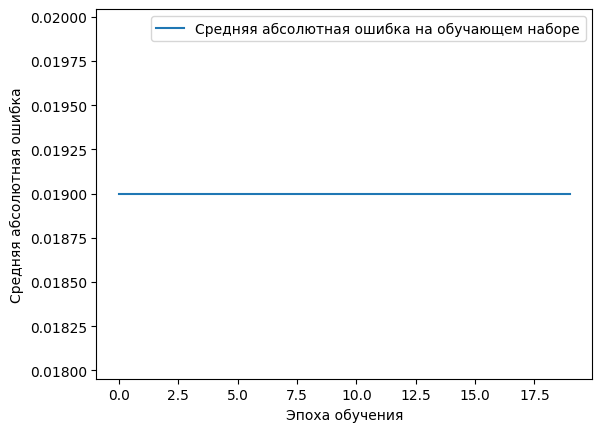

In [38]:
# Построение предварительной модели
# Пока на стадии разработки

model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(xTrain01, 
                    yTrain, 
                    epochs=20, 
                    batch_size=10,
                    # validation_split=0.001,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
# plt.plot(history.history['val_accuracy'], 
#          label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

# Итоги:

1. Предварительно проанализировал данные

2. Разделил некоторые фичи и выделил их в отдельные колонки

3. Создал функции для формирования векторов

4. Создал итоговый вектор под обучение

5. Начал построение модели
